In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import append_sbrt_module

/mnt/c/Users/YSerk/Downloads/Cic-UnB/prof.Ricardo/text-mining


In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering, KMeans
from nltk.corpus import stopwords
import pandas as pd, seaborn as sns, matplotlib as mpl
import sbrt_ibict_ml.sbrt_ibict_ml as sbrt
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dossies = sbrt.get_dossies_df(size=5)
corpus = dossies.text
corpus.head()

0    d n impacto sanitário impacto ambiental esgoto...
1    d d produção cajueiro anão precoce cultivo caj...
2    biodigestor escola tratamento esgoto biogás bi...
3    fortificação rede tecnologia técnica desenvolv...
4    agricultura orgânica apoio desenvolvimento tec...
Name: text, dtype: object

In [5]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('portuguese'))
X = vectorizer.fit_transform(corpus)
X.shape

(5, 1067)

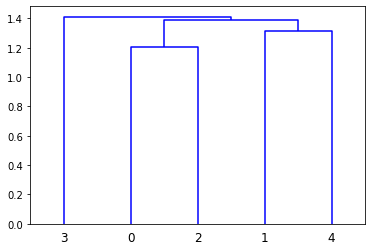

In [6]:
den = dendrogram(linkage(X.toarray(), method='ward'))

In [7]:
metadados = sbrt.get_dossies_metadados_df(dossies.file, ['titulo', 'palavras_chave', 'categoria'])
metadados.head()

,titulo,palavras_chave,categoria
0,Tratamento biológico de esgotos domésticos,"[Esgoto, tratamento biológico, tratamento de...","[SBRT, ÁGUA,ESGOTO,GESTÃO DE RESÍDUOS, Esgoto ..."
1,Produção de mudas de cajueiro anão precoce,"[Caju, cajueiro, cajueiro-anão-precoce, cult...","[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fr..."
2,Biodigestor,"[Biodigestor, biogás, combustível, digestor...","[SBRT, ÁGUA,ESGOTO,GESTÃO DE RESÍDUOS, Esgoto ..."
3,Fortificação de alimentos,"[Alimento, farinha de trigo, controle de qua...","[SBRT, INDÚSTRIAS DE TRANSFORMAÇÃO, Alimentos ..."
4,Agricultura Orgânica,"[Agricultura orgânica, produto orgânico, man...","[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, At..."


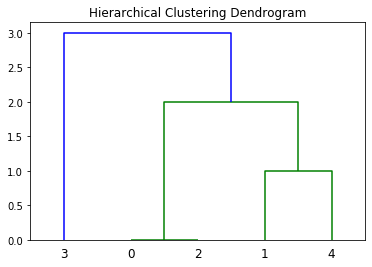

In [8]:
dendrogram_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward').fit(X.toarray())
sbrt.plot_dendrogram(dendrogram_model)

In [15]:
# para ir checando ainda manual as categorias dos clusters
[c for c in metadados.loc[[3]].categoria]

[['SBRT',
  'INDÚSTRIAS DE TRANSFORMAÇÃO',
  'Alimentos e Bebidas',
  'Moagem,amiláceos e alimentos para animais']]

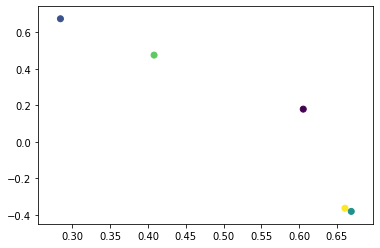

In [10]:
# plota o gráfico do dendrograma pode-se dizer, mas pelo que parece cada ponto tem uma label
svd = TruncatedSVD()
scatter_plot_points = svd.fit_transform(X.toarray())

xs = [o[0] for o in scatter_plot_points]
ys = [o[1] for o in scatter_plot_points]

plt.scatter(x=xs, y=ys, c=dendrogram_model.labels_)

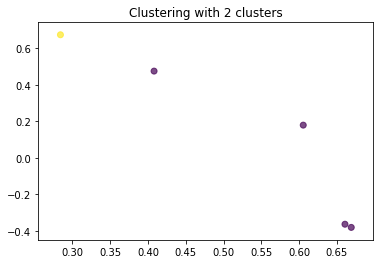

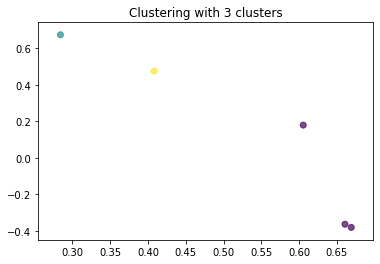

In [11]:
sbrt.plot_N_clusters(AgglomerativeClustering(linkage='complete'), X, 3)

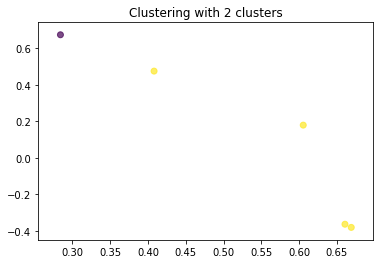

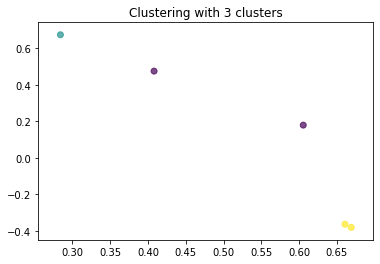

In [12]:
sbrt.plot_N_clusters(KMeans(), X, 3)